In [41]:
import numpy as np
import matplotlib.pylab as plt

In [42]:
import timeit

In [43]:
from scipy.fft import fftn

In [44]:
A = np.random.randn(10, 10)

In [45]:
%%timeit
fftn(A)

9.04 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [46]:
def time_fft(n, n_iter):
    setup = f"""
import numpy as np
from scipy.fft import fftn
A = np.random.randn({n}, {n})
"""
    clock = timeit.Timer('fftn(A)', setup=setup)
    return clock.timeit(number=n_iter)/(n_iter-1)*1000

In [64]:
n_span = np.array( [5, 6, 7, 10, 20, 30, 50, 100, 200, 500, 750, 1000] )

In [65]:
times = [time_fft(n, 100) for n in n_span]

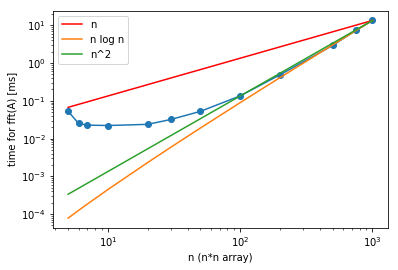

In [66]:
plt.loglog(n_span, times, '-o');
plt.plot(n_span, n_span/n_span[-1]*times[-1], '-r', label='n')
nlogn = 2*n_span**2 *np.log(n_span)
plt.plot(n_span, nlogn/nlogn[-1]*times[-1], '-', label='n log n')

n2 = n_span**2
plt.plot(n_span, n2/n2[-1]*times[-1], '-', label='n^2')

plt.xlabel('n (n*n array)');
plt.ylabel('time for fft(A) [ms]'); plt.legend();

## Numpy vs others

In [59]:
def time_fft_numpy(n, n_iter):
    setup = f"""
import numpy as np
A = np.random.randn({n}, {n})
"""
    clock = timeit.Timer('np.fft.fft2(A)', setup=setup)
    return clock.timeit(number=n_iter)/(n_iter-1)*1000

In [60]:
n_span = np.array( [5, 10, 20, 30, 50, 100, 500, 1000] )

In [61]:
times_numpy = [time_fft_numpy(n, 100) for n in n_span]
times_scipy = [time_fft(n, 100) for n in n_span]

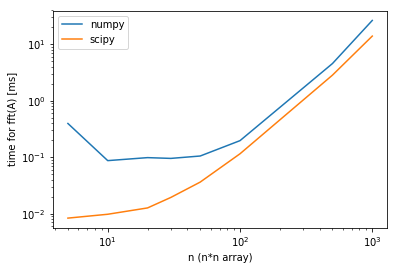

In [63]:
plt.loglog(n_span, times_numpy, '-', label='numpy')
plt.loglog(n_span, times_scipy, '-', label='scipy')

plt.xlabel('n (n*n array)');
plt.ylabel('time for fft(A) [ms]'); plt.legend();